<a href="https://colab.research.google.com/github/Kim-yongbeom/machine-learning/blob/main/data08/iris_scaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [15]:
s_scaler = StandardScaler()
iris = load_iris()

In [16]:
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [17]:
import pandas as pd
import numpy as np

In [19]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [21]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [22]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)

In [23]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [24]:
y = pd.Series(iris.target, dtype='category')

In [39]:
y = y.cat.rename_categories(iris.target_names)

In [40]:
df['species'] = y

In [41]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [42]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [43]:
df.groupby('species').size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

In [44]:
import seaborn as sns

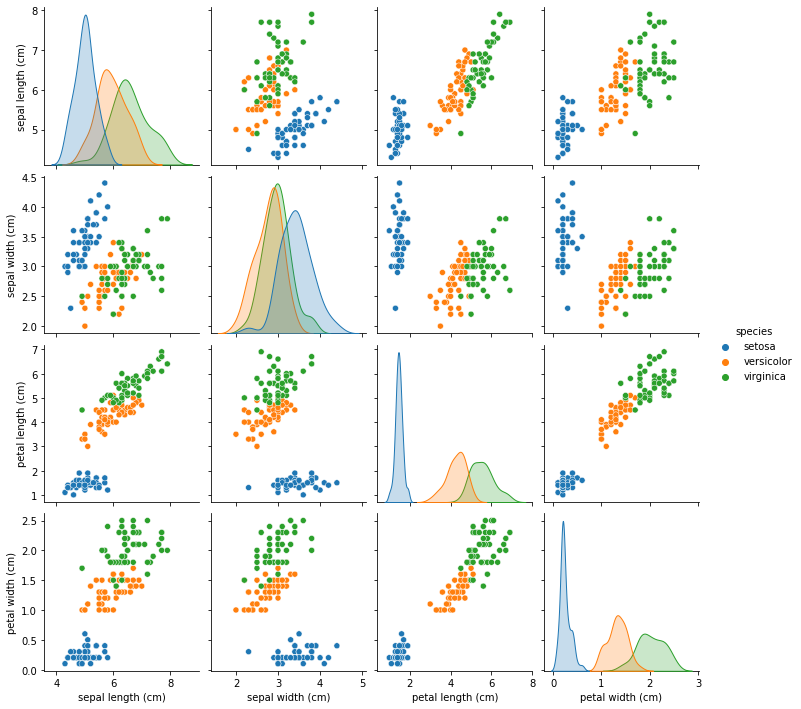

In [45]:
# 상관도 그리기
sns.pairplot(df,hue='species')

In [46]:
import matplotlib.pyplot as plt

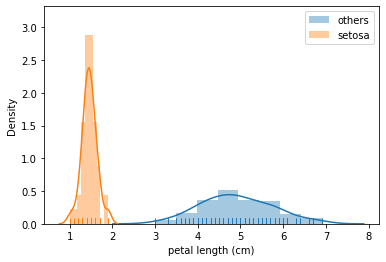

In [47]:
sns.distplot(df[df.species != "setosa"]["petal length (cm)"], hist=True, rug=True, label="others")
sns.distplot(df[df.species == "setosa"]["petal length (cm)"], hist=True, rug=True, label="setosa")
plt.legend()
plt.show()

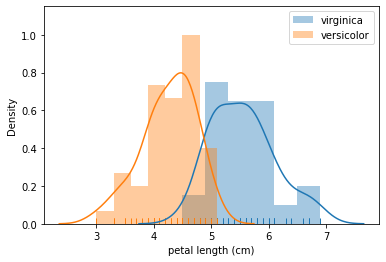

In [48]:
sns.distplot(df[df.species == "virginica"]["petal length (cm)"], hist=True, rug=True, label="virginica")
sns.distplot(df[df.species == "versicolor"]["petal length (cm)"], hist=True, rug=True, label="versicolor")
plt.legend()
plt.show()

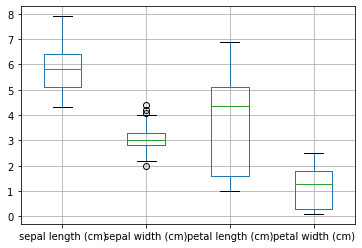

In [50]:
df.boxplot()
plt.show()

In [52]:
from pandas.plotting import parallel_coordinates

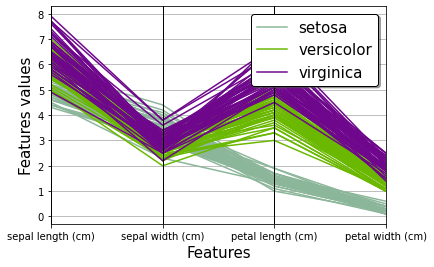

In [54]:
parallel_coordinates(df, "species")
plt.xlabel('Features', fontsize=15)
plt.ylabel('Features values', fontsize=15)
plt.legend(loc=1, prop={'size': 15}, frameon=True, shadow=True, facecolor="white", edgecolor="black")
plt.show()

In [55]:
# 스케일링 표준화
ss = StandardScaler()

In [58]:
from sklearn.model_selection import train_test_split

In [60]:
# train과 test data를 0.75 : 0.25 비율로 나눈다.
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], random_state=3)

In [61]:
X_train_s = pd.DataFrame(ss.fit_transform(X_train),columns=X_train.columns)

In [63]:
# 테스트 데이터만을 가지고, fit시키면 안됨 (transform만 사용)
X_test_s = pd.DataFrame(ss.transform(X_test),columns=X_test.columns)

In [64]:
X_train_s

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.701282,-0.855303,0.852152,0.903021
1,0.444603,-2.029248,0.390247,0.368604
2,0.701282,-0.620514,1.025366,1.170229
3,-0.068753,-0.855303,0.043819,-0.032208
4,-1.608823,1.257798,-1.630584,-1.368249
...,...,...,...,...
107,1.856334,-0.385725,1.429532,0.769416
108,-0.967127,1.492587,-1.341894,-1.101041
109,-0.967127,1.023009,-1.399632,-1.368249
110,2.626369,1.727376,1.487270,1.036625


In [65]:
X_test_s

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-1.608823,0.318642,-1.399632,-1.368249
1,-1.608823,0.083853,-1.341894,-1.368249
2,-0.582110,0.788220,-1.341894,-1.101041
3,-1.095466,-0.150936,-1.284156,-1.368249
4,-0.197092,3.136110,-1.341894,-1.101041
5,2.369691,-1.090092,1.775960,1.437437
6,-0.453771,-1.324881,0.101557,0.101396
7,-1.608823,0.788220,-1.399632,-1.234645
8,0.572943,-0.385725,1.025366,0.769416
9,1.086299,0.083853,0.332509,0.235000


In [66]:
# 스케일링 정규화
ms = MinMaxScaler()

In [68]:
X_train_m = pd.DataFrame(ms.fit_transform(X_train),columns=X_train.columns)
X_test_m = pd.DataFrame(ms.transform(X_test),columns=X_test.columns)

In [69]:
X_train_m

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.583333,0.318182,0.754386,0.750000
1,0.527778,0.090909,0.614035,0.583333
2,0.583333,0.363636,0.807018,0.833333
3,0.416667,0.318182,0.508772,0.458333
4,0.083333,0.727273,0.000000,0.041667
...,...,...,...,...
107,0.833333,0.409091,0.929825,0.708333
108,0.222222,0.772727,0.087719,0.125000
109,0.222222,0.681818,0.070175,0.041667
110,1.000000,0.818182,0.947368,0.791667


In [70]:
X_test_m

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.083333,0.545455,0.070175,0.041667
1,0.083333,0.500000,0.087719,0.041667
2,0.305556,0.636364,0.087719,0.125000
3,0.194444,0.454545,0.105263,0.041667
4,0.388889,1.090909,0.087719,0.125000
5,0.944444,0.272727,1.035088,0.916667
6,0.333333,0.227273,0.526316,0.500000
7,0.083333,0.636364,0.070175,0.083333
8,0.555556,0.409091,0.807018,0.708333
9,0.666667,0.500000,0.596491,0.541667


In [89]:
def print_metrics(model, X_train):
  scores = cross_val_score(model, X_train, y_train, cv=10)
  print('*** Cross val score *** \n   {}'.format(scores))
  print('\n*** Mean Accuracy *** \n   {:.7f}'.format(scores.mean()))
  # print('\n*** Confusion Matrix *** \n', confusion_matrix(y_train, model.predict(X_train)))
  return scores

In [74]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import *

In [75]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
print_metrics(knn,X_train)

*** Cross val score *** 
   [0.91666667 1.         0.90909091 1.         1.         1.
 1.         1.         1.         0.90909091]

*** Mean Accuracy *** 
   0.9734848


In [113]:
knn_s = KNeighborsClassifier()
knn_s.fit(X_train_s,y_train)
result1 = print_metrics(knn_s,X_train_s)
result1

*** Cross val score *** 
   [0.83333333 1.         0.90909091 1.         0.90909091 1.
 1.         0.90909091 0.81818182 0.90909091]

*** Mean Accuracy *** 
   0.9287879


array([0.83333333, 1.        , 0.90909091, 1.        , 0.90909091,
       1.        , 1.        , 0.90909091, 0.81818182, 0.90909091])

In [114]:
knn_m = KNeighborsClassifier()
knn_m.fit(X_train_m,y_train)
result2 = print_metrics(knn_m,X_train_m)
result2

*** Cross val score *** 
   [0.83333333 1.         0.90909091 1.         0.90909091 1.
 1.         1.         0.90909091 0.90909091]

*** Mean Accuracy *** 
   0.9469697


array([0.83333333, 1.        , 0.90909091, 1.        , 0.90909091,
       1.        , 1.        , 1.        , 0.90909091, 0.90909091])

*** Cross val score *** 
   [0.83333333 1.         0.90909091 1.         0.90909091 1.
 1.         1.         0.90909091 0.90909091]

*** Mean Accuracy *** 
   0.9469697
*** Cross val score *** 
   [0.83333333 1.         0.90909091 1.         0.90909091 1.
 1.         0.90909091 0.81818182 0.90909091]

*** Mean Accuracy *** 
   0.9287879


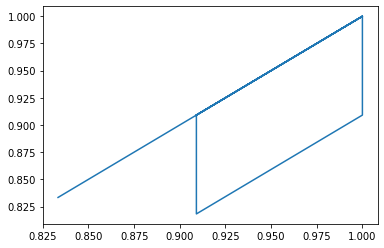

In [94]:
plot1 = plt.plot(print_metrics(knn,X_train_m),print_metrics(knn,X_train_s))
display(plot1)

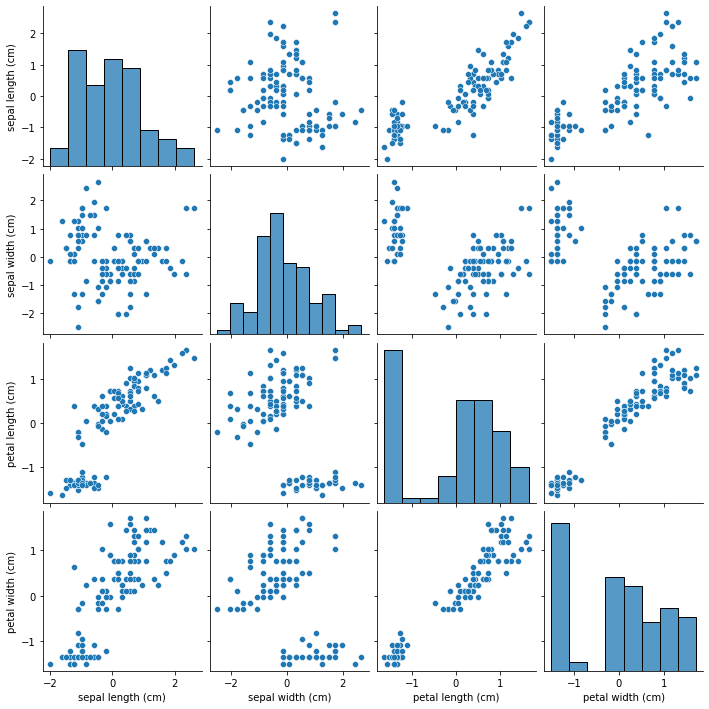

In [99]:
sns.pairplot(X_train_s)

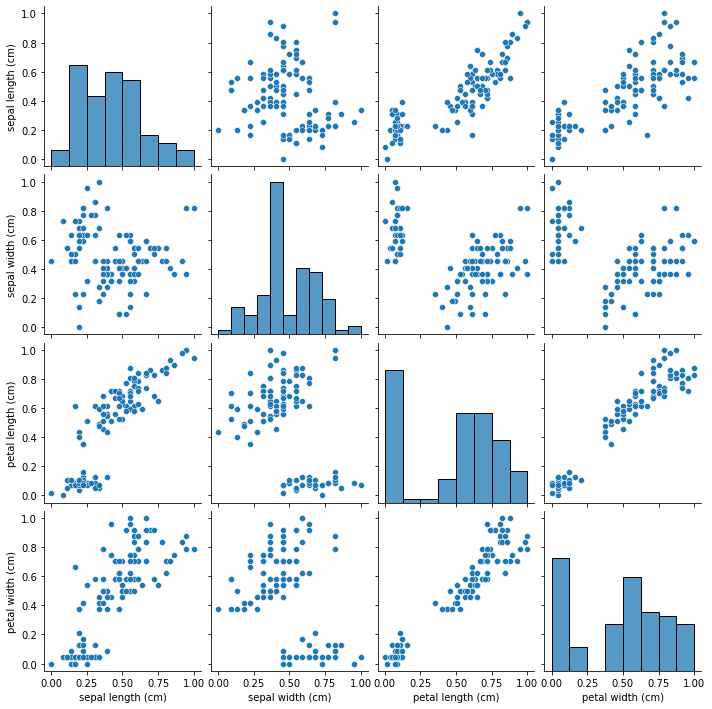

In [98]:
sns.pairplot(X_train_m)

(array([2., 0., 0., 0., 4., 0., 0., 0., 0., 4.]),
 array([0.81818182, 0.83636364, 0.85454545, 0.87272727, 0.89090909,
        0.90909091, 0.92727273, 0.94545455, 0.96363636, 0.98181818,
        1.        ]),
 <a list of 10 Patch objects>)

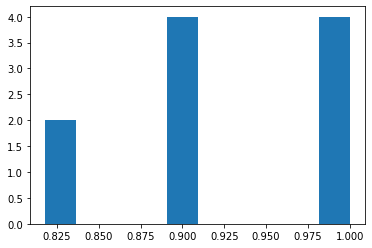

In [102]:
plt.hist(result1)

(array([1., 0., 0., 0., 4., 0., 0., 0., 0., 5.]),
 array([0.83333333, 0.85      , 0.86666667, 0.88333333, 0.9       ,
        0.91666667, 0.93333333, 0.95      , 0.96666667, 0.98333333,
        1.        ]),
 <a list of 10 Patch objects>)

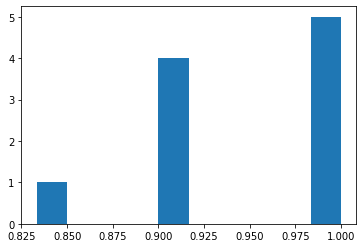

In [103]:
plt.hist(result2)

In [104]:
grid_params = {
    'n_neighbors' : list(range(1,20)),
    'weights' : ["uniform",'distance'],
    'metric' : ['enclidean','manhattan','minkowski']
}

In [106]:
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(knn,grid_params,cv=10)
gs.fit(X_train,y_train)
print('Best Parameters : ', gs.best_params_)
print('Best Score : ', gs.best_score_)
print('Best Test Score : ', gs.score(X_test,y_test))

Best Parameters :  {'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'uniform'}
Best Score :  0.9734848484848484
Best Test Score :  0.9473684210526315


In [112]:
from sklearn.model_selection import GridSearchCV
gs_s = GridSearchCV(knn,grid_params,cv=10)
gs_s.fit(X_train_s,y_train)
print('Best Parameters : ', gs_s.best_params_)
print('Best Score : ', gs_s.best_score_)
print('Best Test Score : ', gs_s.score(X_test_s,y_test))

Best Parameters :  {'metric': 'minkowski', 'n_neighbors': 16, 'weights': 'distance'}
Best Score :  0.9727272727272727
Best Test Score :  0.9473684210526315


In [111]:
from sklearn.model_selection import GridSearchCV
gs_m = GridSearchCV(knn,grid_params,cv=10)
gs_m.fit(X_train_m,y_train)
print('Best Parameters : ', gs_m.best_params_)
print('Best Score : ', gs_m.best_score_)
print('Best Test Score : ', gs_m.score(X_test_m,y_test))

Best Parameters :  {'metric': 'minkowski', 'n_neighbors': 9, 'weights': 'uniform'}
Best Score :  0.9734848484848484
Best Test Score :  0.9473684210526315


In [117]:
def print_test_metrics(model, X_test):
    print('*** Test Accuracy *** \n   {}'.format(model.score(X_test, y_test)))
    print('\n*** Confusion Matrix *** \n', confusion_matrix(y_test, model.predict(X_test)))

In [118]:
print_test_metrics(knn_m,X_test_m)

*** Test Accuracy *** 
   0.9473684210526315

*** Confusion Matrix *** 
 [[15  0  0]
 [ 0 11  1]
 [ 0  1 10]]
